In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
data = pd.read_csv('DS-Take-Home-Sample-Data - DS-Take-Home-Sample-Data.csv')
data.head()

,source,campaign,region,locality,preferred_doctor_gender,dental_anxiety,last_visited_a_dentist,how_soon_they_want_to_book,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested,appointment_status,appointment_scheduled,appointment_billed,chosen_provider_insurance_status,chosen_provider_distance
0,facebook,san_diego_dentist_patient_acquisition,San Jose,San Jose,No Pref,A little nervous,< 1 year,ASAP,Specific Treatment,f,9,0,0,10547.219510,f,NaN,f,NaN,NaN,NaN
1,facebook,san_diego_dentist_patient_acquisition,San Diego,Chula Vista,F,Not at all nervous,2+ years,2 weeks,Checkup & Cleaning,f,2,0,0,20784.617720,f,NaN,f,NaN,NaN,NaN
2,try.opencare.com,Unknown,Austin,Austin,No Pref,Moderately nervous,2+ years,ASAP,Checkup & Cleaning,t,9,8,1,8014.945931,t,CANCELLED,f,f,in-network,2855.594821
3,facebook,denver_dentist_patient_acquisition,Denver,Golden,No Pref,Not at all nervous,< 1 year,ASAP,Specific Treatment,t,8,2,6,16651.158750,f,NaN,f,NaN,NaN,NaN
4,facebook,chicago_dentist_patient_acquisition,Chicago,Chicago,F,Not at all nervous,< 1 year,1 week,Checkup & Cleaning,f,9,0,0,5216.934559,f,NaN,f,NaN,NaN,NaN


In [167]:
status = data[data.appointment_scheduled == 't']

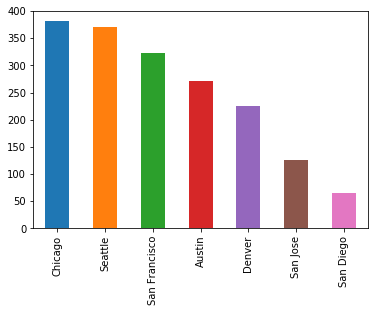

In [168]:
status.region.value_counts().plot(kind = 'bar')

In [27]:
len(status)

1760

In [28]:
len(data)

11933

In [29]:
appt_made = (len(status)/len(data)) * 100

In [31]:
print("{} % of applicants schedule an interview".format(appt_made))

14.7490153356239 % of applicants schedule an interview


In [33]:
regions = data.region.unique()

In [41]:
total_region = data.region.value_counts()
status_region = status.region.value_counts()

In [50]:
total_region.head()
total_region =pd.DataFrame(total_region).reset_index()

In [51]:
status_region = pd.DataFrame(status_region).reset_index()

In [52]:
status_region

,index,region
0,Chicago,381
1,Seattle,370
2,San Francisco,323
3,Austin,271
4,Denver,225
5,San Jose,125
6,San Diego,65


In [53]:
perc_region = total_region.merge(status_region, on = 'index')

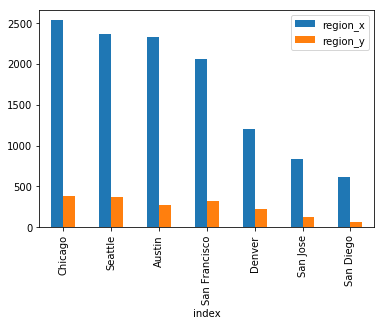

In [57]:
perc_region.plot(kind = 'bar', x = 'index')

In [59]:
perc_region['appt_scheduled'] = perc_region.region_y/perc_region.region_x * 100

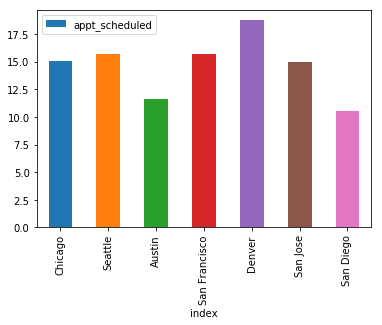

In [62]:
perc_region.plot(kind = 'bar', x = 'index', y = 'appt_scheduled')

In [63]:
data.source.describe()

count        11915
unique          73
top       facebook
freq          7350
Name: source, dtype: object

In [64]:
data.campaign.describe()

count       11927
unique         49
top       Unknown
freq         2404
Name: campaign, dtype: object

In [82]:
src = data.source.value_counts()

In [77]:
src_appt = data[data.appointment_scheduled == 't']


In [83]:
src = pd.DataFrame(src).reset_index()

In [85]:
src.head()

,index,source
0,facebook,7350
1,adwords,1308
2,www.opencare.com,633
3,Patients,451
4,try.opencare.com,407


In [78]:
src_appt = src_appt.source.value_counts()

In [86]:
src_appt = pd.DataFrame(src_appt).reset_index()

In [87]:
source_data = src.merge(src_appt, on = 'index')

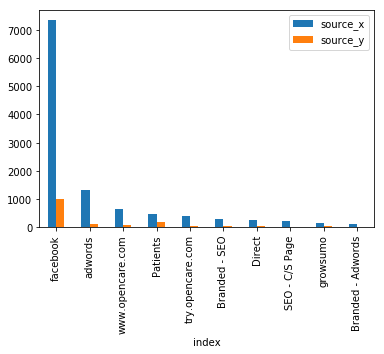

In [90]:
source_data[:10].plot(kind = 'bar', x = 'index')

In [91]:
source_data['percent_appt'] = source_data.source_y/source_data.source_x * 100

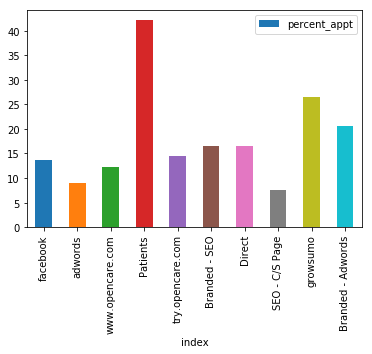

In [98]:
source_data.sort_values(by = 'source_x', ascending = False)[:10].plot(kind = 'bar', x = 'index', y = 'percent_appt')

In [99]:
denver = data[data.region == 'Denver']

In [101]:
denver.appointment_scheduled.value_counts()

f    975
t    225
Name: appointment_scheduled, dtype: int64

In [ ]:
## we know that the highest conversion rate happens in Denver and happens using Patients as advertising source

In [ ]:
## Which sources are most successful in each city?

In [111]:
data['applicant'] = 1

In [105]:
appt_booked = []
for i in data.appointment_scheduled:
    if i == 't':
        appt_booked.append(1)
    else:
        appt_booked.append(0)

In [107]:
data['appt_booked'] = appt_booked

In [121]:
region_source = data.groupby(['region', 'source'])['applicant', 'appt_booked'].sum().reset_index()

In [126]:
region_source.sort_values(by = 'appt_booked', ascending = False)[:10]

,region,source,applicant,appt_booked
51,Chicago,facebook,1315,199
188,Seattle,facebook,1382,180
144,San Francisco,facebook,1205,167
13,Austin,facebook,1380,161
85,Denver,facebook,963,161
168,San Jose,facebook,595,86
180,Seattle,Patients,122,56
116,San Diego,facebook,509,49
41,Chicago,Patients,107,43
134,San Francisco,Patients,95,41


In [138]:
maxes = region_source.groupby(['region'])['applicant'].max().reset_index()

In [140]:
region_source1 = region_source.merge(maxes, on= 'region')

In [142]:
region_source1[region_source1.applicant_x == region_source1.applicant_y]

,region,source,applicant_x,appt_booked,applicant_y
13,Austin,facebook,1380,161,1380
51,Chicago,facebook,1315,199,1315
85,Denver,facebook,963,161,963
116,San Diego,facebook,509,49,509
144,San Francisco,facebook,1205,167,1205
168,San Jose,facebook,595,86,595
188,Seattle,facebook,1382,180,1382
208,Washington DC,Direct,5,0,5


In [143]:
region_source1['perc_conv'] = region_source1.appt_booked/region_source1.applicant_x *100

In [144]:
max_conv = region_source1.groupby(['region'])['perc_conv'].max().reset_index()

In [1]:
resource = region_source1.merge(max_conv, on = 'region')

NameError: name 'region_source1' is not defined

In [151]:
region_source1[region_source1.applicant_x == region_source1.applicant_y]

,region,source,applicant_x,appt_booked,applicant_y,perc_conv
13,Austin,facebook,1380,161,1380,11.666667
51,Chicago,facebook,1315,199,1315,15.133080
85,Denver,facebook,963,161,963,16.718588
116,San Diego,facebook,509,49,509,9.626719
144,San Francisco,facebook,1205,167,1205,13.858921
168,San Jose,facebook,595,86,595,14.453782
188,Seattle,facebook,1382,180,1382,13.024602
208,Washington DC,Direct,5,0,5,0.000000


In [169]:
data.fillna(0)

,source,campaign,region,locality,preferred_doctor_gender,dental_anxiety,last_visited_a_dentist,how_soon_they_want_to_book,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested,appointment_status,appointment_scheduled,appointment_billed,chosen_provider_insurance_status,chosen_provider_distance
0,facebook,san_diego_dentist_patient_acquisition,San Jose,San Jose,No Pref,A little nervous,< 1 year,ASAP,Specific Treatment,f,9,0,0,10547.219510,f,0,f,0,0,0.000000
1,facebook,san_diego_dentist_patient_acquisition,San Diego,Chula Vista,F,Not at all nervous,2+ years,2 weeks,Checkup & Cleaning,f,2,0,0,20784.617720,f,0,f,0,0,0.000000
2,try.opencare.com,Unknown,Austin,Austin,No Pref,Moderately nervous,2+ years,ASAP,Checkup & Cleaning,t,9,8,1,8014.945931,t,CANCELLED,f,f,in-network,2855.594821
3,facebook,denver_dentist_patient_acquisition,Denver,Golden,No Pref,Not at all nervous,< 1 year,ASAP,Specific Treatment,t,8,2,6,16651.158750,f,0,f,0,0,0.000000
4,facebook,chicago_dentist_patient_acquisition,Chicago,Chicago,F,Not at all nervous,< 1 year,1 week,Checkup & Cleaning,f,9,0,0,5216.934559,f,0,f,0,0,0.000000
5,Direct,Unknown,San Francisco,San Francisco,No Pref,Moderately nervous,2+ years,ASAP,Urgent Issue,t,9,8,1,2150.607797,f,0,f,0,0,0.000000
6,facebook,chicago_dentist_patient_acquisition,Chicago,Hanover Park,F,Not at all nervous,1 - 2 years,2 weeks,Checkup & Cleaning,t,3,2,1,21242.310320,f,0,f,0,0,0.000000
7,Direct,Unknown,San Francisco,San Francisco,No Pref,Moderately nervous,2+ years,ASAP,Urgent Issue,t,9,5,4,2150.607797,f,0,f,0,0,0.000000
8,www.opencare.com,Unknown,Seattle,Renton,No Pref,Not at all nervous,1 - 2 years,No preference,Checkup & Cleaning,t,9,3,6,9143.706180,f,0,f,0,0,0.000000
9,adwords,search_chicago_local,Chicago,Ottawa,No Pref,A little nervous,< 1 year,ASAP,Urgent Issue,t,0,0,0,0.000000,f,0,f,0,0,0.000000


In [170]:
cat_features = list(data.columns[data.dtypes == 'object'])
cat_features
    

['source',
 'campaign',
 'region',
 'locality',
 'preferred_doctor_gender',
 'dental_anxiety',
 'last_visited_a_dentist',
 'how_soon_they_want_to_book',
 'reason_for_visit',
 'patient_insured',
 'appointment_requested',
 'appointment_status',
 'appointment_scheduled',
 'appointment_billed',
 'chosen_provider_insurance_status']

In [171]:
# make dictionary for category
cat_dict = {}

for col in cat_features:
    cat_dict[col] = {}
    count = 0
    for label in list(data[col].unique()):
        cat_dict[col][label] = count
        count += 1
    
def convert_cat(col, label):
    return (cat_dict[col][label])

for col in cat_features:
    data[col] = data[col].apply(lambda x: convert_cat(col,x))

In [155]:
data.head(10)

,source,campaign,region,locality,preferred_doctor_gender,dental_anxiety,last_visited_a_dentist,how_soon_they_want_to_book,reason_for_visit,patient_insured,...,avg_distance_overall,appointment_requested,appointment_status,appointment_scheduled,appointment_billed,chosen_provider_insurance_status,chosen_provider_distance,newcol,appt_booked,applicant
0,0,0,0,0,0,0,0,0,0,0,...,10547.219510,0,0,0,0,0,NaN,1,0,1
1,0,0,1,1,1,1,1,1,1,0,...,20784.617720,0,0,0,0,0,NaN,1,0,1
2,1,1,2,2,0,2,1,0,1,1,...,8014.945931,1,1,0,1,1,2855.594821,1,0,1
3,0,2,3,3,0,1,0,0,0,1,...,16651.158750,0,0,0,0,0,NaN,1,0,1
4,0,3,4,4,1,1,0,2,1,0,...,5216.934559,0,0,0,0,0,NaN,1,0,1
5,2,1,5,5,0,2,1,0,2,1,...,2150.607797,0,0,0,0,0,NaN,1,0,1
6,0,3,4,6,1,1,2,1,1,1,...,21242.310320,0,0,0,0,0,NaN,1,0,1
7,2,1,5,5,0,2,1,0,2,1,...,2150.607797,0,0,0,0,0,NaN,1,0,1
8,3,1,6,7,0,1,2,3,1,1,...,9143.706180,0,0,0,0,0,NaN,1,0,1
9,4,4,4,8,0,0,0,0,2,1,...,NaN,0,0,0,0,0,NaN,1,0,1


In [157]:
data.columns

Index(['source', 'campaign', 'region', 'locality', 'preferred_doctor_gender',
       'dental_anxiety', 'last_visited_a_dentist',
       'how_soon_they_want_to_book', 'reason_for_visit', 'patient_insured',
       'number_of_match_results', 'out_network_results_shown',
       'in_network_results_shown', 'avg_distance_overall',
       'appointment_requested', 'appointment_status', 'appointment_scheduled',
       'appointment_billed', 'chosen_provider_insurance_status',
       'chosen_provider_distance', 'newcol', 'appt_booked', 'applicant'],
      dtype='object')

In [173]:
data.dtypes

source                                int64
campaign                              int64
region                                int64
locality                              int64
preferred_doctor_gender               int64
dental_anxiety                        int64
last_visited_a_dentist                int64
how_soon_they_want_to_book            int64
reason_for_visit                      int64
patient_insured                       int64
number_of_match_results               int64
out_network_results_shown             int64
in_network_results_shown              int64
avg_distance_overall                float64
appointment_requested                 int64
appointment_status                    int64
appointment_scheduled                 int64
appointment_billed                    int64
chosen_provider_insurance_status      int64
chosen_provider_distance            float64
dtype: object

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(data[['source', 'campaign', 'region', 'locality', 'preferred_doctor_gender',
       'dental_anxiety', 'last_visited_a_dentist',
       'how_soon_they_want_to_book', 'reason_for_visit', 'patient_insured',
       'number_of_match_results', 'out_network_results_shown',
       'in_network_results_shown']].values,
                                              (data[['appointment_requested']]).values,random_state=5)

clf = RandomForestClassifier(random_state =0)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the training data.
clf.score(Xlr, ylr)

### If I run this multiple times, I get different answers each time. Why?
### how do I adjust C?

/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.9491563303162365

In [184]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [190]:
## RFE Features selection


X = Xlr
Y = ylr
names = data.keys()
 
#use linear regression as the model
clf = RandomForestClassifier(random_state =0)
#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X,Y)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

/home/andrea/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features sorted by their rank:
[(1, 'locality'), (2, 'campaign'), (3, 'in_network_results_shown'), (4, 'dental_anxiety'), (5, 'source'), (6, 'number_of_match_results'), (7, 'how_soon_they_want_to_book'), (8, 'out_network_results_shown'), (9, 'last_visited_a_dentist'), (10, 'region'), (11, 'reason_for_visit'), (12, 'preferred_doctor_gender'), (13, 'patient_insured')]


In [188]:
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [201]:
data.head()

,source,campaign,region,locality,preferred_doctor_gender,dental_anxiety,last_visited_a_dentist,how_soon_they_want_to_book,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested,appointment_status,appointment_scheduled,appointment_billed,chosen_provider_insurance_status,chosen_provider_distance
0,0,0,0,0,0,0,0,0,0,0,9,0,0,10547.219510,0,0,0,0,0,NaN
1,0,0,1,1,1,1,1,1,1,0,2,0,0,20784.617720,0,0,0,0,0,NaN
2,1,1,2,2,0,2,1,0,1,1,9,8,1,8014.945931,1,1,0,1,1,2855.594821
3,0,2,3,3,0,1,0,0,0,1,8,2,6,16651.158750,0,0,0,0,0,NaN
4,0,3,4,4,1,1,0,2,1,0,9,0,0,5216.934559,0,0,0,0,0,NaN
